In [1]:
import numpy as np
import seaborn as sns
import cv2
import scipy
import os
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import Image
from sklearn.svm import SVC
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from time import time

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [2]:
import glob
imagePatches = glob.glob(r'C:\Users\karth\Desktop\train\COVID\*.png', recursive=True)
for filename in imagePatches[0:10]:
    print(filename)

C:\Users\karth\Desktop\train\COVID\COVID-19 (1)_0_5517.png
C:\Users\karth\Desktop\train\COVID\COVID-19 (1)_0_6270.png
C:\Users\karth\Desktop\train\COVID\COVID-19 (1)_0_7686.png
C:\Users\karth\Desktop\train\COVID\COVID-19 (1)_0_8131.png
C:\Users\karth\Desktop\train\COVID\COVID-19 (1)_0_8556.png
C:\Users\karth\Desktop\train\COVID\COVID-19 (1)_0_8915.png
C:\Users\karth\Desktop\train\COVID\COVID-19 (10)_0_4729.png
C:\Users\karth\Desktop\train\COVID\COVID-19 (10)_0_5715.png
C:\Users\karth\Desktop\train\COVID\COVID-19 (10)_0_5887.png
C:\Users\karth\Desktop\train\COVID\COVID-19 (10)_0_6608.png


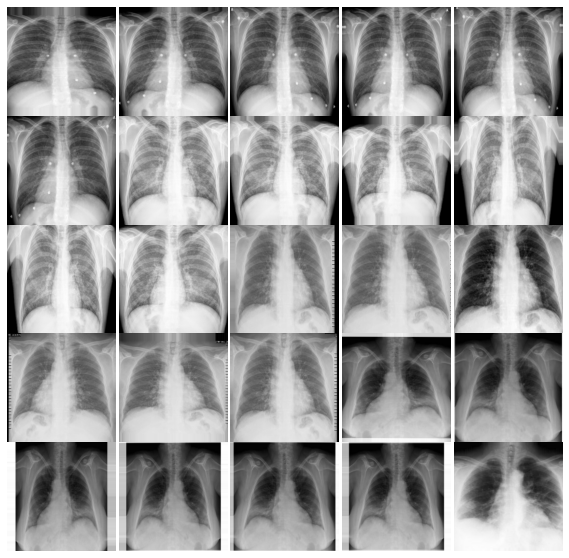

In [3]:
# Plot Multiple COVID-19 Images
bunchOfImages = imagePatches
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in bunchOfImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (224, 224)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

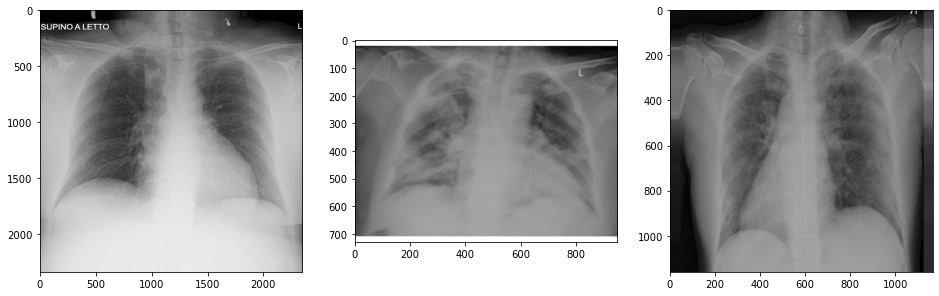

In [4]:
import random
def randomImages(a):
    r = random.sample(a, 4)
    plt.figure(figsize=(16,16))
    plt.subplot(131)
    plt.imshow(cv2.imread(r[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(r[2])); 
randomImages(imagePatches)

In [5]:
imagePatches2 = glob.glob(r'C:\Users\karth\Desktop\train\normal\*.png', recursive=True)
for filename in imagePatches2[0:10]:
    print(filename)

C:\Users\karth\Desktop\train\normal\Normal (1)_0_1582.png
C:\Users\karth\Desktop\train\normal\Normal (1)_0_3176.png
C:\Users\karth\Desktop\train\normal\Normal (1)_0_5371.png
C:\Users\karth\Desktop\train\normal\Normal (1)_0_6297.png
C:\Users\karth\Desktop\train\normal\Normal (1)_0_8823.png
C:\Users\karth\Desktop\train\normal\Normal (1)_0_995.png
C:\Users\karth\Desktop\train\normal\Normal (10)_0_3761.png
C:\Users\karth\Desktop\train\normal\Normal (10)_0_4788.png
C:\Users\karth\Desktop\train\normal\Normal (10)_0_6433.png
C:\Users\karth\Desktop\train\normal\Normal (10)_0_6690.png


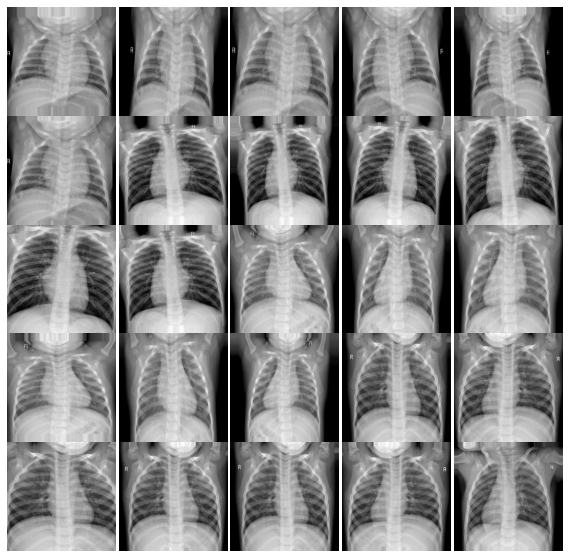

In [6]:
# Plot Multiple NORMAL Images
bunchOfImages2 = imagePatches2
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in bunchOfImages2[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (224, 224)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

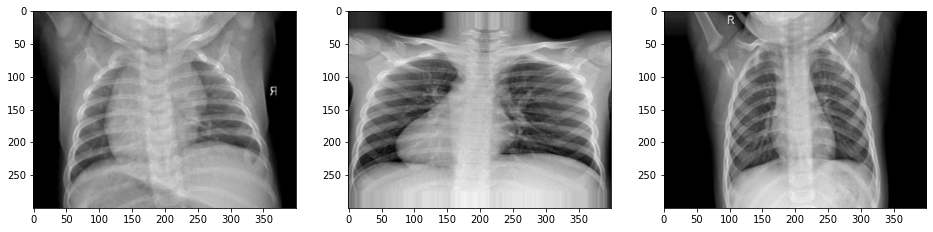

In [7]:
import random
def randomImages(a):
    r = random.sample(a, 4)
    plt.figure(figsize=(16,16))
    plt.subplot(131)
    plt.imshow(cv2.imread(r[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(r[2])); 
randomImages(imagePatches2)

In [8]:
def get_data(folder):
    X = []
    y = []

    for rayx_type in os.listdir(folder):
        if not rayx_type.startswith('.'):
            if rayx_type in ['COVID']:
                label = '0'   #Labels COVID Images
            else:
                label = '1'   #labels NORMAL Images
            for image_filename in os.listdir(folder + rayx_type):
                img_file = cv2.imread(folder + rayx_type + '/' + image_filename, 0)
                if img_file is not None:
                    # Downsample the image to 224, 224
                    image = cv2.resize(img_file, (224, 224)) #contains image file name and resized image dimmensions 
                    img_arr = np.asarray(image)  #converts input into array
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)   #converts input into array
    y = np.asarray(y)   #converts input into array
    return X,y

In [10]:
X_train, y_train = get_data(r'C:\Users\karth\Desktop\train\\')
X_test, y_test = get_data(r'C:\Users\karth\Desktop\test\\')

#scikit-learn expects 2d num arrays for the training dataset for a fit function. 
#Dataset reshaping from a 3D array to a 2D array

print(X_train.shape) #outputs 3D array: the amount of sample images, and both image dimmensions 

print(y_train.shape) #outputs the amount of labels created (should match the amount of sample images)

nsamples, nx, ny = X_train.shape  #nsamples = amount of sample images, nx = first image dimmension, ny = second image dimmension
nsamples2, nx2, ny2 = X_test.shape
X_train_2D = X_train.reshape((nsamples,nx*ny))
X_test_2D = X_test.reshape((nsamples2,nx2*ny2))

print(X_train_2D.shape) #outputs reformed 2D array: the amount of sample images, and combined image dimmensions

encoder = LabelEncoder() #normalizes labels
encoder.fit(y_train)
y_train_2D = encoder.transform(y_train)
y_test_2D = encoder.transform(y_test)

(648, 224, 224)
(648,)
(648, 50176)


In [11]:
%%time

param_grid = {'C':[.001, .01, .1, 1, 10, 100, 1000]}
gs = GridSearchCV(LogisticRegression(max_iter = 1000), param_grid, cv = 5)
gs_fitted_lr = gs.fit(X_train_2D, y_train_2D) #training the model using reformatted training dataset
gs_fitted_lr.best_score_

Wall time: 2min 37s


0.9784376863446631

In [12]:
gs_fitted_lr.best_params_

{'C': 0.001}

In [13]:
gs_fitted_lr.best_estimator_

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
%%time

y_prediction = gs_fitted_lr.best_estimator_.predict(X_test_2D)
print(y_prediction)
print(classification_report(y_test_2D, y_prediction))

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       128
           1       0.98      0.96      0.97       204

    accuracy                           0.96       332
   macro avg       0.96      0.96      0.96       332
weighted avg       0.96      0.96      0.96       332


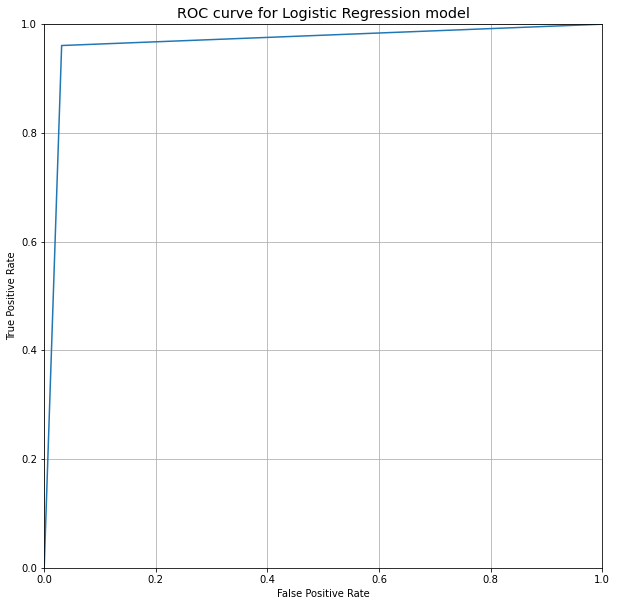

In [15]:
fpr, tpr, thresholds = roc_curve(y_test_2D, y_prediction)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Logistic Regression model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

Confusion Matrix without Normalization


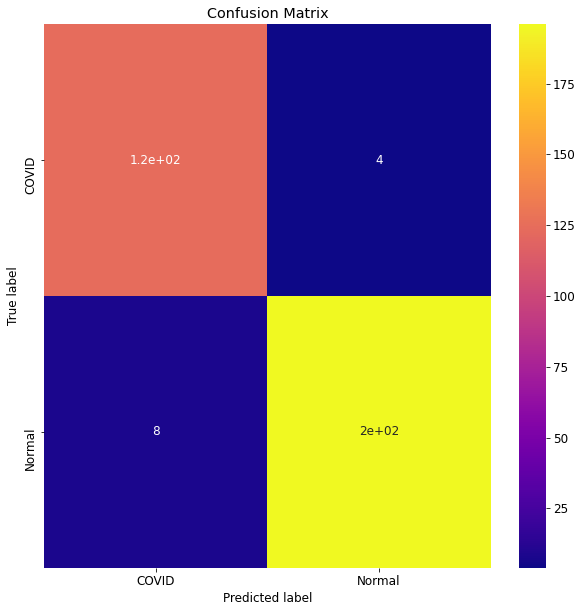

Confusion Matrix with Normalized Values


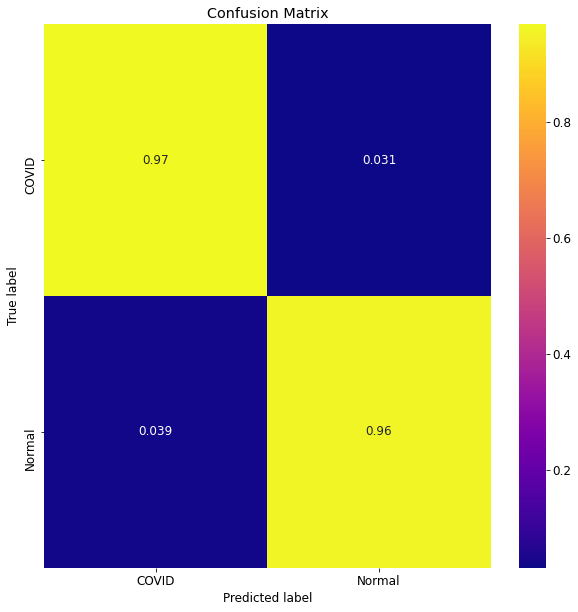

In [16]:
def plot_confusion_matrix(normalize):
  classes = ['COVID','Normal']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(y_test_2D, y_prediction,normalize=normalize)
  sns.heatmap(cn,cmap='plasma',annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

In [17]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test_2D, y_prediction)


cm = confusion_matrix(y_test_2D, y_prediction)
total = sum(sum(cm))
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(score))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[124   4]
 [  8 196]]
acc: 0.9639
sensitivity: 0.9688
specificity: 0.9608


In [18]:
%%time

param_grid = {'n_neighbors': [3,5,7,9,11], 'metric': ['euclidean', 'manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5)
gs_fitted_knn = gs.fit(X_train_2D,y_train_2D) #training the model using reformatted training dataset
gs_fitted_knn.best_score_

Wall time: 6min 31s


0.9259749552772808

In [19]:
gs_fitted_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 5}

In [20]:
%%time
y_predictionKNN =gs_fitted_knn.best_estimator_.predict(X_test_2D)
print(y_predictionKNN)
print(classification_report(y_test_2D, y_predictionKNN))
print(confusion_matrix(y_test_2D, y_predictionKNN))

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       128
           1       0.95      0.96      0.96       204

    accuracy                           0.95       332
   macro avg       0.94      0.94      0.94       332
weighted avg       0.95      0.95      0.95       332


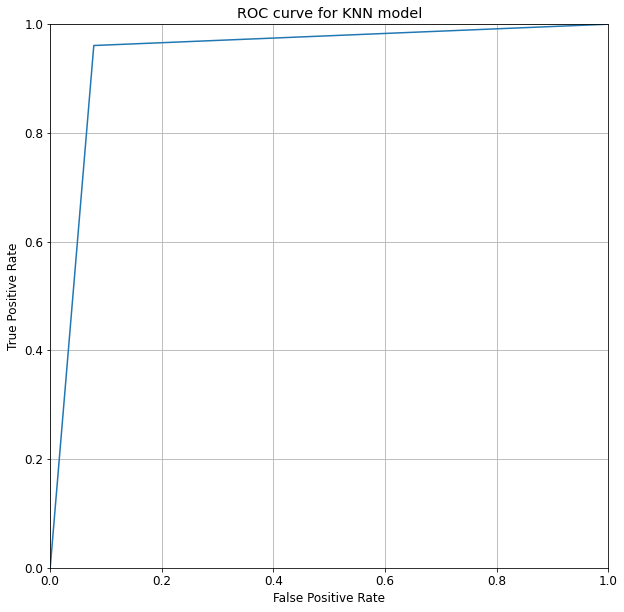

In [21]:
fpr, tpr, thresholds = roc_curve(y_test_2D, y_predictionKNN)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for KNN model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

Confusion Matrix without Normalization


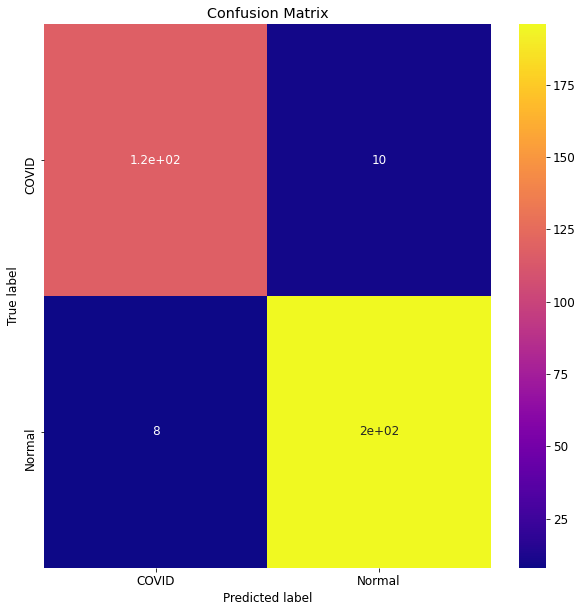

Confusion Matrix with Normalized Values


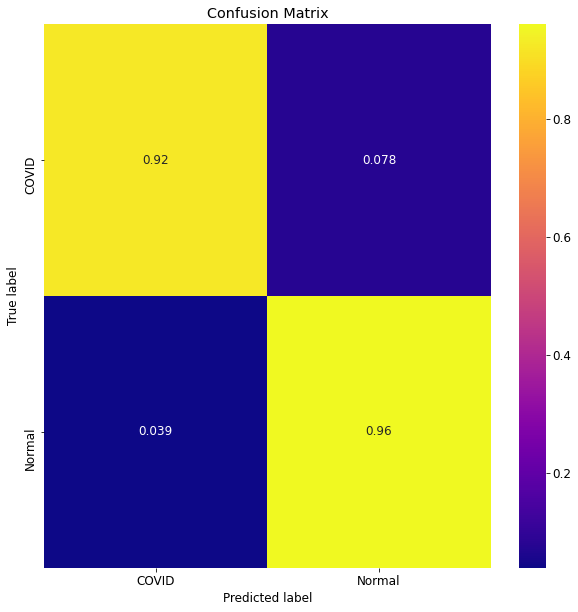

In [22]:
def plot_confusion_matrix(normalize):
  classes = ['COVID','Normal']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(y_test_2D, y_predictionKNN,normalize=normalize)
  sns.heatmap(cn,cmap='plasma',annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

In [23]:
score = accuracy_score(y_test_2D, y_predictionKNN)


cm = confusion_matrix(y_test_2D, y_predictionKNN)
total = sum(sum(cm))
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(score))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[118  10]
 [  8 196]]
acc: 0.9458
sensitivity: 0.9219
specificity: 0.9608


In [24]:
%%time

tree =DecisionTreeClassifier()
tree.fit(X_train_2D, y_train_2D) #training the model using reformatted training dataset

Wall time: 11.3 s


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
%%time


y_predTree=tree.predict(X_test_2D)
print(y_predTree)
print(classification_report(y_test_2D,y_predTree))
print(confusion_matrix(y_test_2D, y_predTree))

[1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       128
           1       0.93      0.88      0.91       204

    accuracy                           0.89       332
   macro avg       0.88      0.89      0.88       332
weighted avg       0.89      0.89      0.89       332


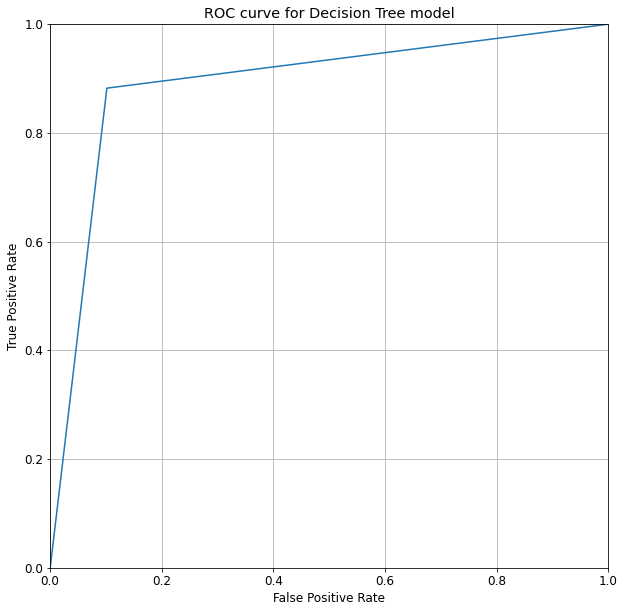

In [26]:
fpr, tpr, thresholds = roc_curve(y_test_2D, y_predTree)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Decision Tree model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

Confusion Matrix without Normalization


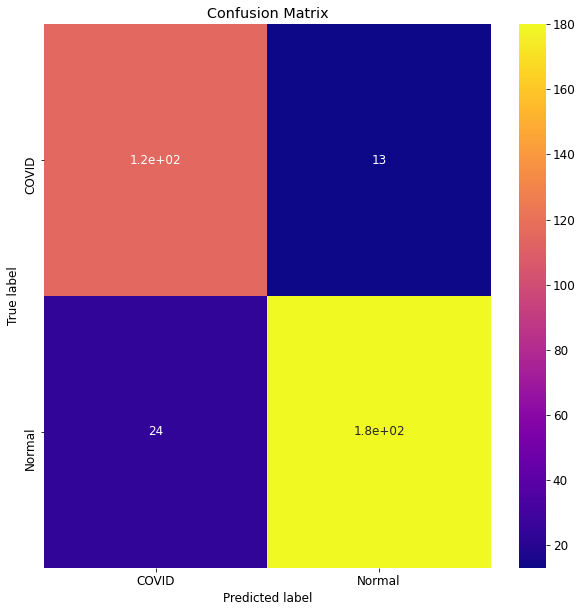

Confusion Matrix with Normalized Values


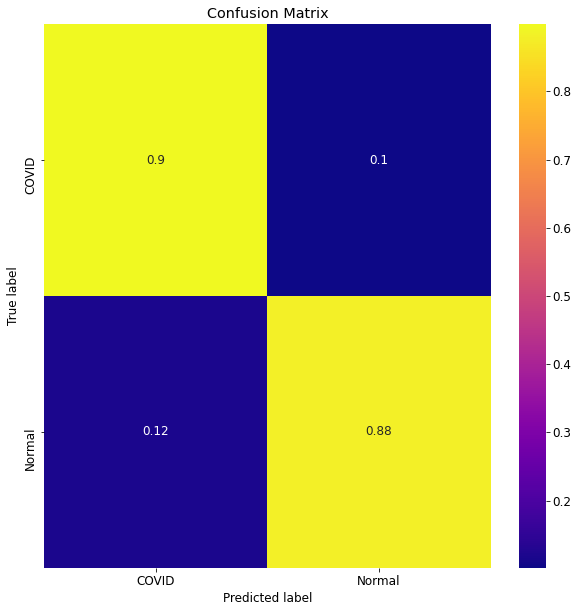

In [27]:
def plot_confusion_matrix(normalize):
  classes = ['COVID','Normal']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(y_test_2D, y_predTree,normalize=normalize)
  sns.heatmap(cn,cmap='plasma',annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

In [28]:
score = accuracy_score(y_test_2D, y_predTree)


cm = confusion_matrix(y_test_2D, y_predTree)
total = sum(sum(cm))
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(score))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[115  13]
 [ 24 180]]
acc: 0.8886
sensitivity: 0.8984
specificity: 0.8824


In [29]:
%%time

forest = RandomForestClassifier(max_depth=3, random_state=0)
forest.fit(X_train_2D, y_train_2D) #training the model using reformatted training dataset

Wall time: 2.71 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [30]:
%%time 


y_predForest=forest.predict(X_test_2D)
print(y_predForest)
print(classification_report(y_test_2D,y_predForest))
print(confusion_matrix(y_test_2D, y_predForest))

[0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       128
           1       0.96      0.94      0.95       204

    accuracy                           0.94       332
   macro avg       0.93      0.94      0.93       332
weighted avg       0.94      0.94      0.94       332


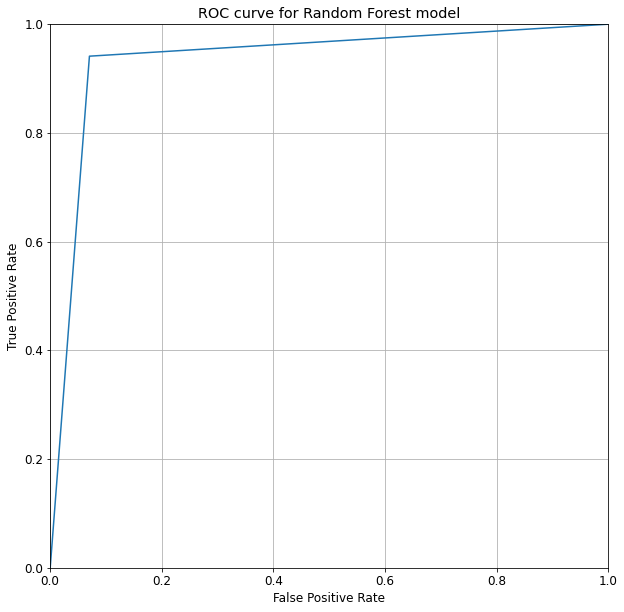

In [31]:
fpr, tpr, thresholds = roc_curve(y_test_2D, y_predForest)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Random Forest model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

Confusion Matrix without Normalization


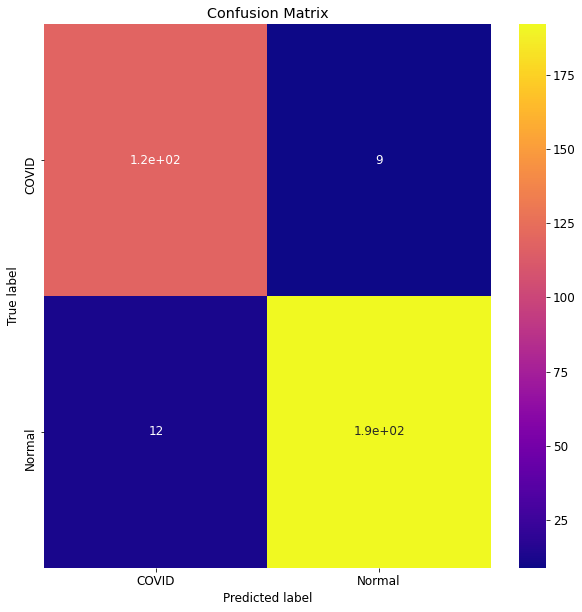

Confusion Matrix with Normalized Values


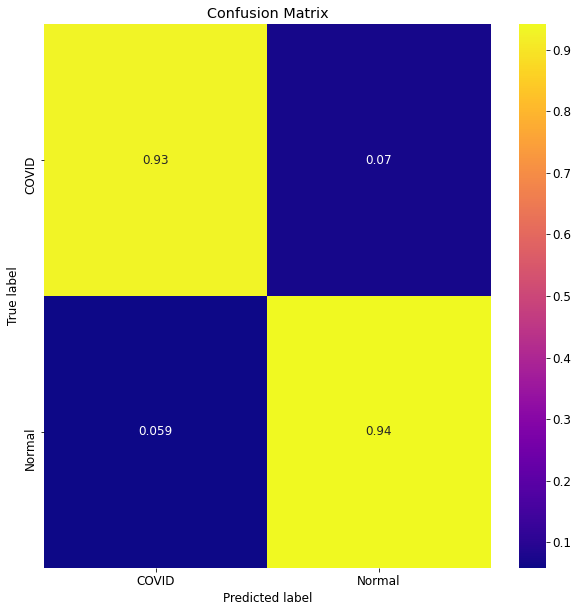

In [32]:
def plot_confusion_matrix(normalize):
  classes = ['COVID','Normal']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(y_test_2D, y_predForest,normalize=normalize)
  sns.heatmap(cn,cmap='plasma',annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

In [33]:
score = accuracy_score(y_test_2D, y_predForest)


cm = confusion_matrix(y_test_2D, y_predForest)
total = sum(sum(cm))
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(score))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[119   9]
 [ 12 192]]
acc: 0.9367
sensitivity: 0.9297
specificity: 0.9412
